## covid-19 Data exploration from data set available by John hopkins CSSE

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#import plotly.graph_objects as go
#from fbprophet import Prophet
import pycountry
#import plotly.express as px

# importing time series datasets of confirmed, recovered and deaths

In [2]:
dir_path = '.'
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
df_confirmed = pd.read_csv(url + 'time_series_covid19_confirmed_global.csv',error_bad_lines=False)  #( time_series_19-covid-Confirmed.csv)
df_recovered = pd.read_csv(url + 'time_series_covid19_recovered_global.csv',error_bad_lines=False) #pd.read_csv("time_series_19-covid-Recovered.csv")
df_deaths = pd.read_csv(url + 'time_series_covid19_deaths_global.csv',error_bad_lines=False) #pd.read_csv("time_series_19-covid-Deaths.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
#df = pd.read_csv(url, error_bad_lines=False)


In [3]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,24,24,40,40,74,84,94,110,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,87,90,139,201,230,264,302,367,409,454
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5


In [4]:
df_confirmed=df_confirmed.groupby(["Country"]).sum()
df_confirmed=df_confirmed.drop(columns=['Lat','Long'])
df_recovered=df_recovered.groupby(["Country"]).sum()
df_recovered=df_recovered.drop(columns=['Lat','Long'])
df_deaths=df_deaths.groupby(["Country"]).sum()
df_deaths=df_deaths.drop(columns=['Lat','Long'])
df_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,22,24,24,40,40,74,84,94,110,110
Albania,0,0,0,0,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197
Algeria,0,0,0,0,0,0,0,0,0,0,...,87,90,139,201,230,264,302,367,409,454
Andorra,0,0,0,0,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308
Angola,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5


# extracting top 60 infected countries

In [5]:
top_affected_countries=df_confirmed.sort_values(['3/20/20'],ascending=False).index[:63].values #20/20
top_affected_countries=np.delete(top_affected_countries,[62,59,58,57,55])

top_affected_countries

array(['China', 'Italy', 'Spain', 'Germany', 'Iran', 'US', 'France',
       'Korea, South', 'Switzerland', 'United Kingdom', 'Netherlands',
       'Austria', 'Belgium', 'Norway', 'Sweden', 'Denmark', 'Malaysia',
       'Portugal', 'Japan', 'Canada', 'Czechia', 'Brazil', 'Australia',
       'Diamond Princess', 'Ireland', 'Israel', 'Pakistan', 'Greece',
       'Luxembourg', 'Qatar', 'Finland', 'Chile', 'Poland', 'Iceland',
       'Singapore', 'Indonesia', 'Ecuador', 'Turkey', 'Saudi Arabia',
       'Slovenia', 'Thailand', 'Romania', 'Bahrain', 'Egypt', 'Estonia',
       'Russia', 'India', 'Peru', 'Philippines', 'Iraq', 'South Africa',
       'Mexico', 'Lebanon', 'Kuwait', 'San Marino', 'Slovakia', 'Taiwan*',
       'Croatia'], dtype=object)

In [6]:
np.savetxt('top_affected_countries.txt',top_affected_countries, delimiter=" ", fmt="%s")

In [7]:
df_confirmed_top=df_confirmed.loc[top_affected_countries,:]
df_recovered_top=df_recovered.loc[top_affected_countries,:]
df_deaths_top=df_deaths.loc[top_affected_countries,:]
df_confirmed_top.to_csv('confirmed-data-top-affected-countries.csv')
df_confirmed_top.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
Country,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81156,81250,81305,81435,81498,81591,81661,81782,81897,81999
Italy,0,0,0,0,0,0,0,0,0,2,...,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472
Spain,0,0,0,0,0,0,0,0,0,0,...,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235
Germany,0,0,0,0,0,1,4,4,4,5,...,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695
Iran,0,0,0,0,0,0,0,0,0,0,...,18407,19644,20610,21638,23049,24811,27017,29406,32332,35408


In [8]:
df_active_top=df_confirmed_top-df_recovered_top - df_deaths_top
df_active1_top=df_confirmed_top-df_recovered_top

df_active_top.to_csv('active-data-top-affected-countries.csv')
df_active1_top.to_csv('active1-data-top-affected-countries.csv')


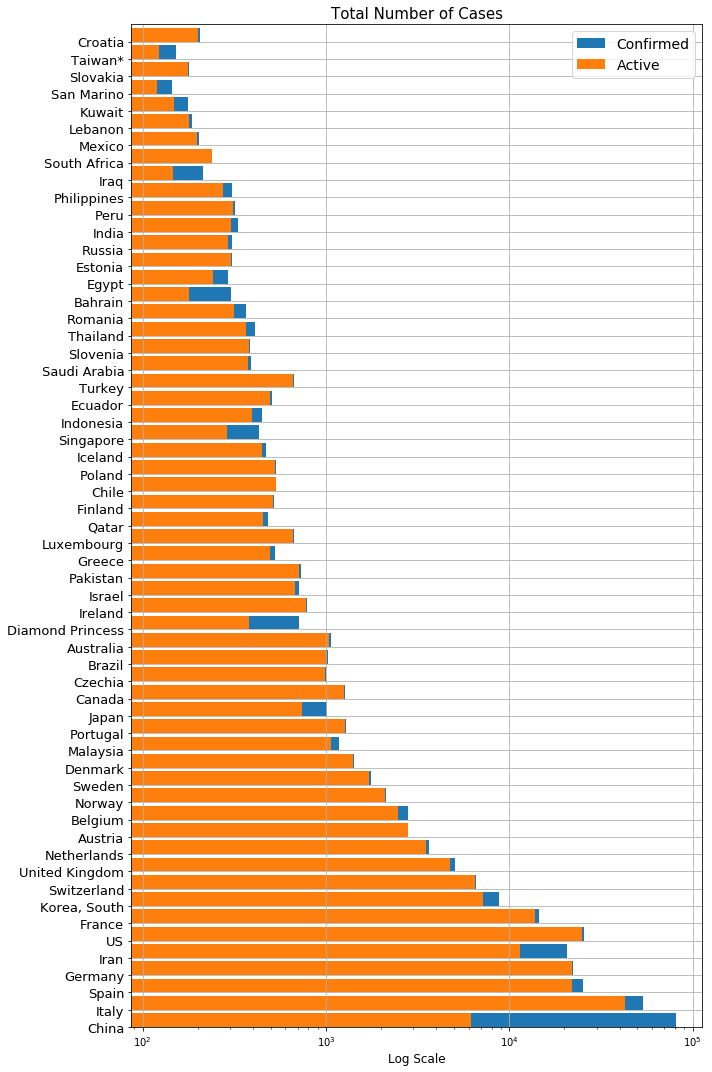

In [9]:
plt.figure(figsize=(10,15))
plt.title('Total Number of Cases',fontsize=15)
y_pos=np.arange(0,len(top_affected_countries))
p1 =plt.barh(y_pos,width=((df_confirmed_top['3/21/20'].values)),align='edge',label='Confirmed')
p1 =plt.barh(y_pos,width=((df_active_top['3/21/20'].values)),align='edge', label='Active')
plt.yticks(y_pos,top_affected_countries,rotation=0,fontsize=13)
plt.ylim(0,len(top_affected_countries))
plt.legend(fontsize=14)
plt.xlabel('Log Scale',fontsize=12)
plt.xscale('log')
plt.grid()
#plt.xlim([9e4,0])
plt.tight_layout()
plt.savefig('Confirmed_active_hor.png')
#pd.plotting.table(data=df_confirmed_top['3/21/20'])

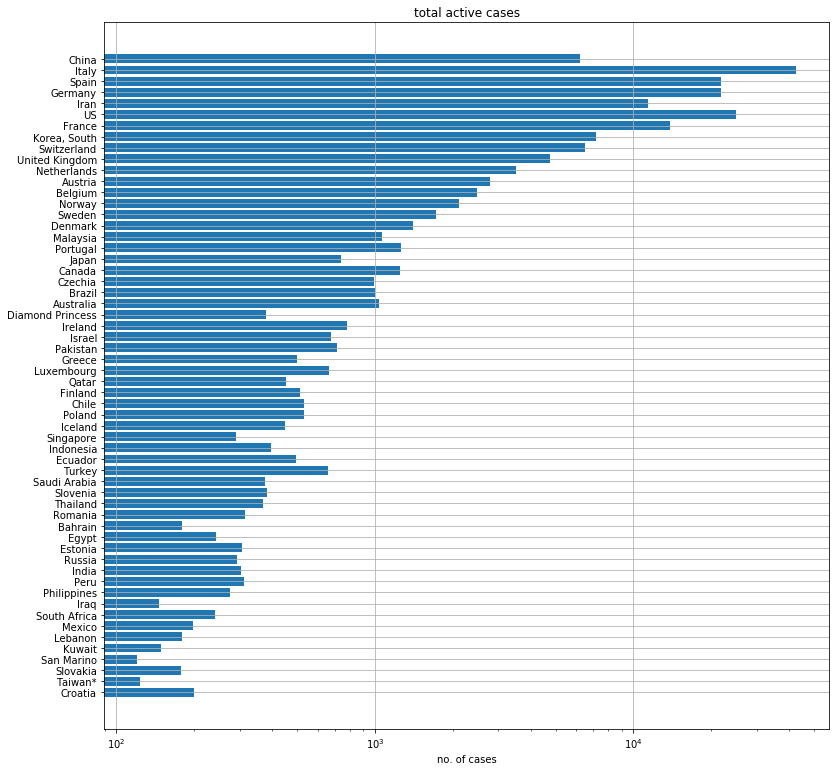

In [10]:
plt.figure(figsize=(13,13))
plt.title('total active cases')
plt.barh(np.flip(top_affected_countries),np.flip(df_active_top['3/21/20'].values))
plt.xlabel('no. of cases')
plt.xscale('log')
plt.grid()

In [11]:
confirmed_mat=df_confirmed_top.as_matrix()
deaths_mat=df_deaths_top.as_matrix()
recovered_mat=df_recovered_top.as_matrix()
active_mat = df_active_top.as_matrix()

/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


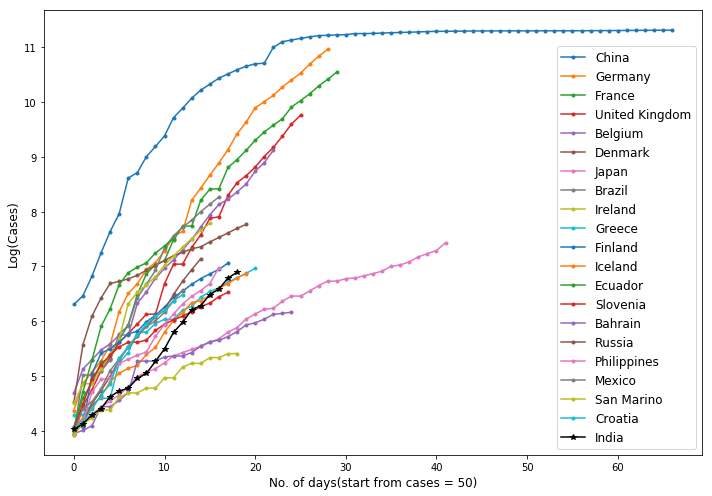

In [12]:
plt.figure(figsize=(10,7))
idx=np.where(top_affected_countries== 'India')[0][0]
[plt.plot(np.log(confirmed_mat[i,confirmed_mat[i,:]>50]),'.-',label=top_affected_countries[i]) for i in range(0,60,3)]
plt.plot(np.log(confirmed_mat[idx,confirmed_mat[idx,:]>50]),'k*-',label=top_affected_countries[idx])
plt.legend(fontsize=12)
plt.xlabel('No. of days(start from cases = 50)',fontsize=12)
plt.ylabel('Log(Cases)',fontsize=12)
#plt.yscale('log')
plt.tight_layout()
plt.savefig('timeseries.pdf')

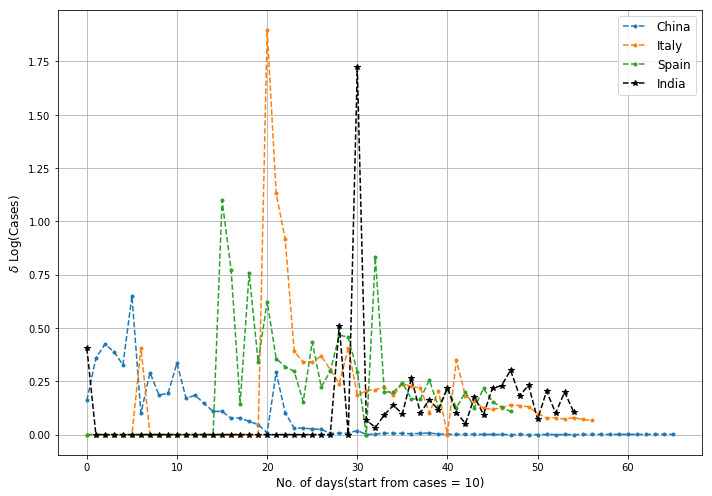

In [13]:
plt.figure(figsize=(10,7))
idx=np.where(top_affected_countries== 'India')[0][0]
[plt.plot(np.diff(np.log(confirmed_mat[i,confirmed_mat[i,:]>1])),'.--',label=top_affected_countries[i]) for i in range(0,3)]
plt.plot(np.diff(np.log(confirmed_mat[idx,confirmed_mat[idx,:]>1])),'k*--',label=top_affected_countries[idx])
plt.legend(fontsize=12)
plt.xlabel('No. of days(start from cases = 10)',fontsize=12)
plt.ylabel('$\delta$ Log(Cases)',fontsize=12)
plt.grid()
#plt.yscale('log')
plt.tight_layout()
plt.savefig('time_deriv.pdf')

In [14]:
def plot_cases(confirmed_mat,thr=5,top_affected_countries=top_affected_countries):
    l=len(top_affected_countries)
    india_idx=np.where(top_affected_countries== 'India')[0][0]
    plt.figure(figsize=(10,10))
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[india_idx,idx.T]),'k.-',label=top_affected_countries[india_idx])
    for i in range(0,15):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'.-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[i,idx.T]),'k.-',label=top_affected_countries[india_idx])
    for i in range(15,28):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'.-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[india_idx,idx.T]),'k.-',label=top_affected_countries[india_idx])
    for i in range(28,40):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'.-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    for i in range(40,l):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'*-',label=top_affected_countries[i])
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[india_idx,idx.T]),'k*-',label=top_affected_countries[india_idx])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()

confirmed_cases


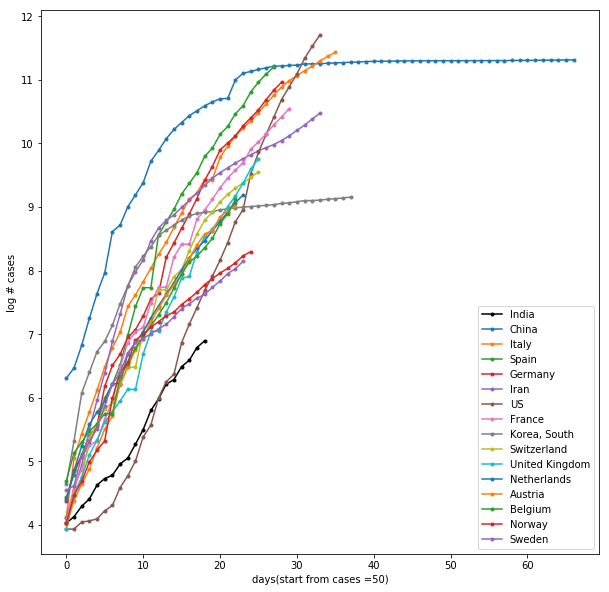

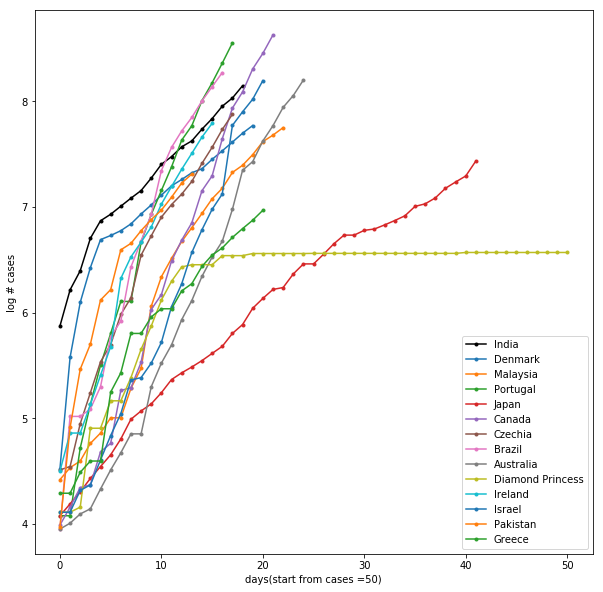

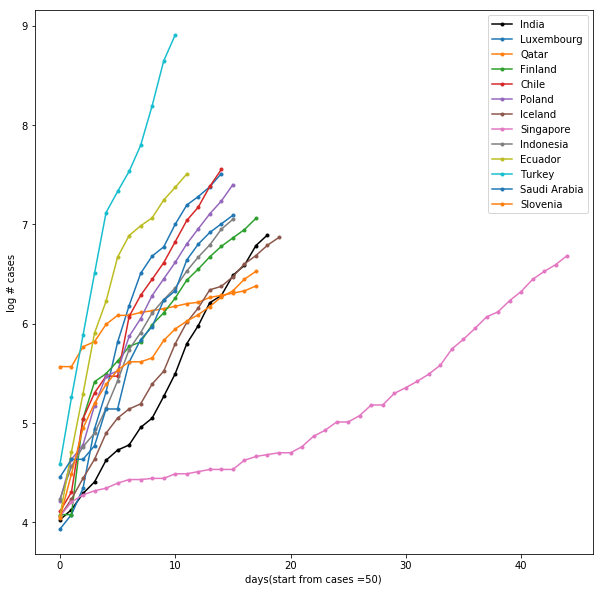

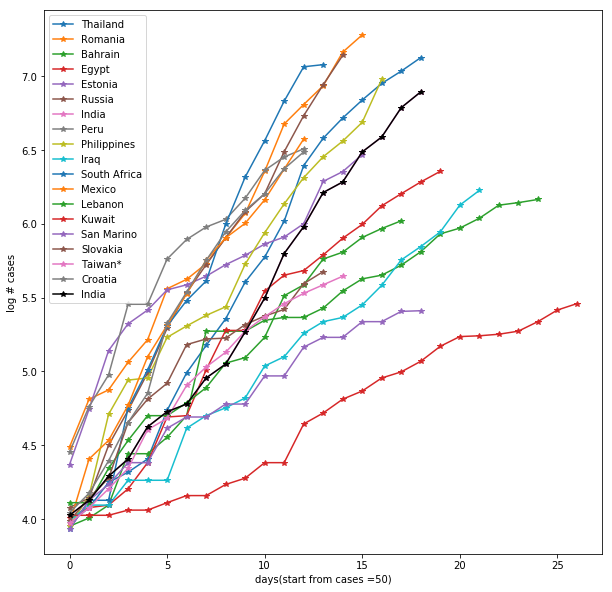

In [15]:
%matplotlib inline
print('confirmed_cases')
plot_cases(confirmed_mat,thr=50)

active_cases


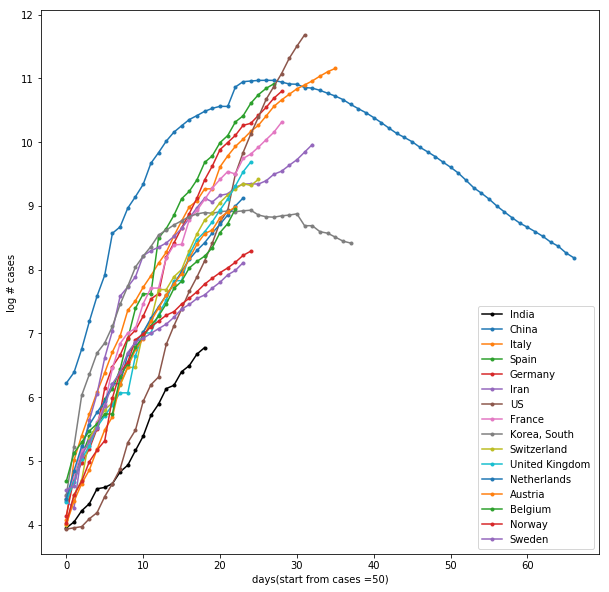

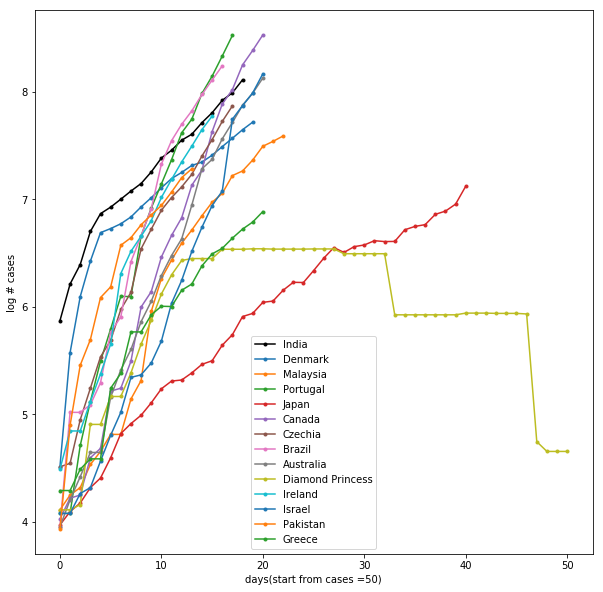

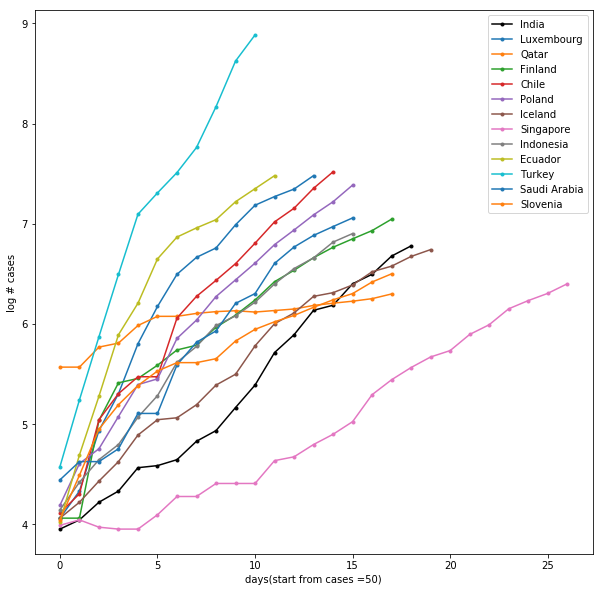

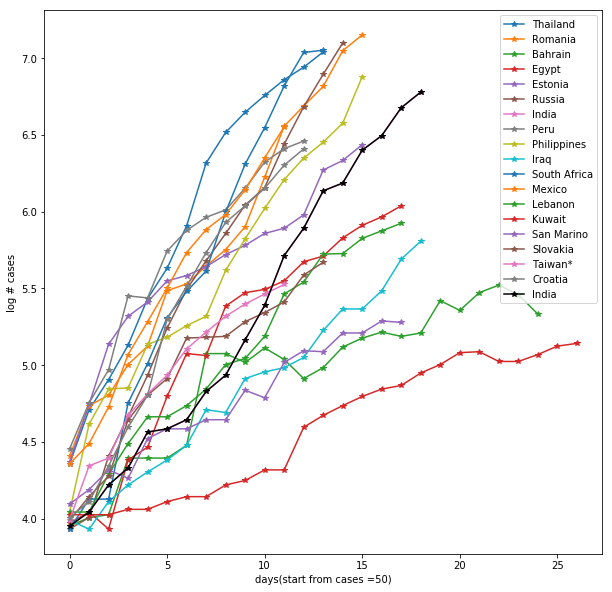

In [16]:
print('active_cases')
plot_cases(active_mat,thr=50)

In [17]:
#print('death_cases')
#plot_cases(deaths_mat,thr=1)

In [18]:
#print('recovered_cases')
#plot_cases(recovered_mat,thr=5)

# slope of log(#cases) v/s days: spread rate in logarithmic phase

In [19]:
def calc_slopes(confirmed_mat,thr=3,guess=1,extra=False):
    #slopes=np.zeros(50)
    l=len(top_affected_countries)
    fit_params = np.zeros([l,5])
    for i in range(l):
        idx=np.where(confirmed_mat[i,:]>=thr)[0]
        y = np.log(confirmed_mat[i,idx.T])
        if len(y)>0:
            x = np.arange(len(y))
            z, res, _, _, _ = np.polyfit(x, y, guess,full=True)
            #slopes[i]=z[0]
            fit_params[i,0]=z[0]
            fit_params[i,1]=z[1]
            fit_params[i,2]=idx[0]
            fit_params[i,3]= np.log(confirmed_mat[i,idx[0]])
            fit_params[i,4]=res                        
    return fit_params
    # p = np.poly1d(z)
    # fit = p(x)
  #  plt.figure()
  #  plt.hist(slopes,20,histtype='step')
  #  plt.xlabel('slope')
  #  print('mean,median = ',slopes.mean(),np.median(slopes))
  #  plt.figure(figsize=(30,10))
  #  plt.plot(slopes,'*-')
  #  plt.xticks(np.arange(0,50))
  #  plt.xlabel("Country")
  #  plt.ylabel("slope of log cases")
  #  plt.grid()
    

In [20]:
fit_params_confirmed=calc_slopes(confirmed_mat,thr=50)
fit_params_active=calc_slopes(active_mat,thr=50)

In [21]:
#confirmed cases 
def make_df_cases(fit_params_confirmed):
    confirmed_fit_df= pd.DataFrame()
    confirmed_fit_df['Country']=top_affected_countries
    confirmed_fit_df['slope(log cases)'] = fit_params_confirmed[:,0]
    confirmed_fit_df['start day'] = fit_params_confirmed[:,2].astype(int)
    confirmed_fit_df['start date']=df_confirmed_top.columns[confirmed_fit_df['start day']]
    confirmed_fit_df['intersecpt(log cases)'] = fit_params_confirmed[:,1]
    confirmed_fit_df['MSE fit'] = fit_params_confirmed[:,3]
    confirmed_fit_df['total cases'] =df_confirmed_top['3/25/20'].values
    confirmed_fit_df=confirmed_fit_df.sort_values('slope(log cases)')
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'China']
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'Korea, South']
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'Cruise Ship']
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'United Arab Emirates']

    return confirmed_fit_df

# sorted from highest to lowest spread rate of confirm cases

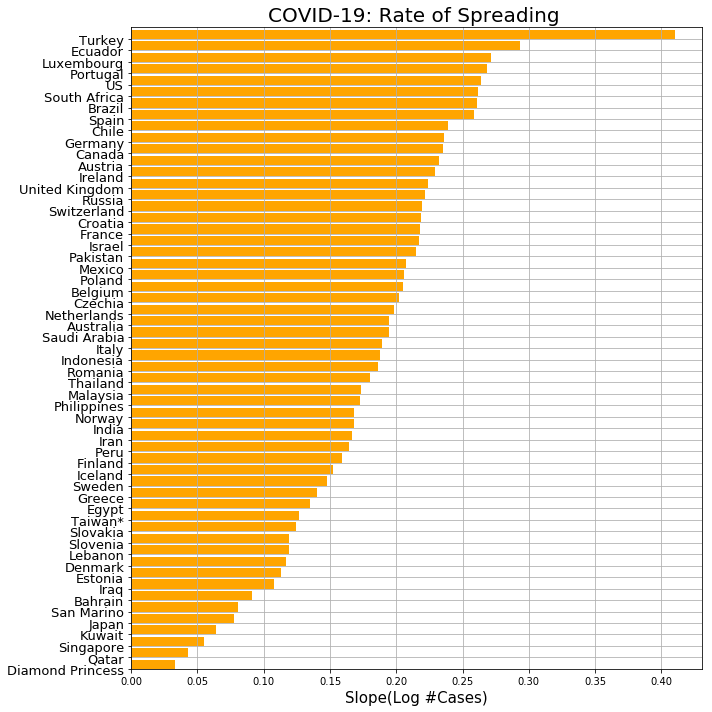

In [43]:
confirmed_fit_df=make_df_cases(fit_params_confirmed)
#confirmed_fit_df.to_csv(r'47_countries_confirmed_fit.csv', index = False)
plt.figure(figsize=(10,10))
plt.title('COVID-19: Rate of Spreading ',fontsize=20)
plt.xlabel('Slope(Log #Cases)',fontsize=15)
y_pos=np.arange(0,len(confirmed_fit_df['Country'].values))
plt.barh(y_pos,width=(confirmed_fit_df['slope(log cases)'].values),align='edge',color='orange')
plt.yticks(y_pos,(confirmed_fit_df['Country'].values),rotation=0,fontsize=13)
plt.ylim(0,len(confirmed_fit_df['Country'].values))
plt.tight_layout()
plt.grid()
plt.savefig('spread_rate_bar_hor.png')

## Future Plans:
Case studies on: Singapore, Japan, Qatar, Bahrain, Estonia for their low spread rate(slope)
 
Case studies on: Portugal, Pakistan, Luxembourg, Turkey, Ecuador for their high spread rate(slope)

Fit slopes v/s : population density, temperature, humidity, economy, medical facilities, shutdown call, transport bans

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


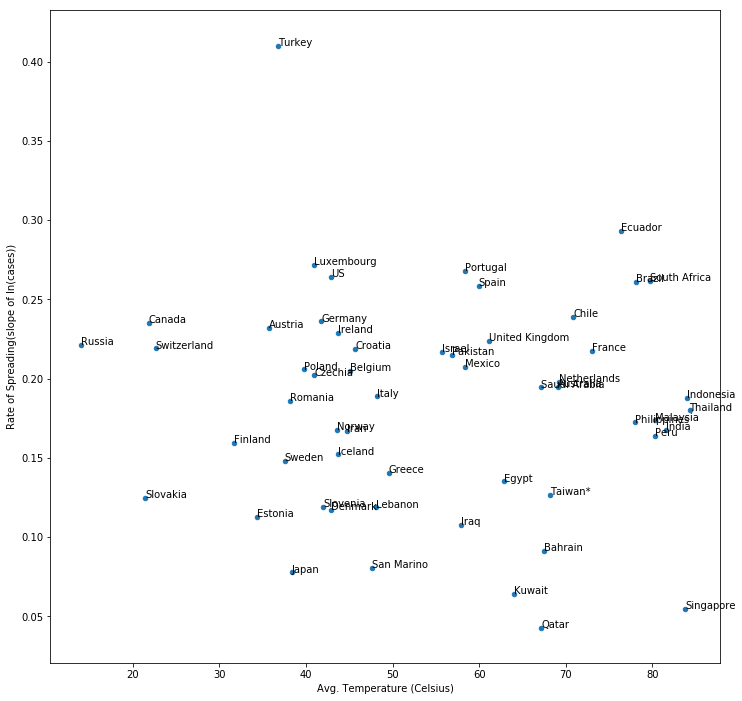

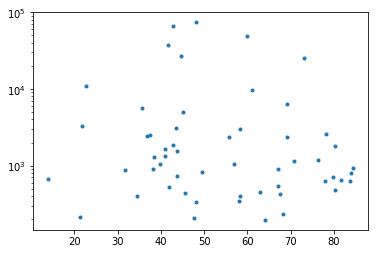

In [74]:
temp_df=pd.read_csv('training_data_with_weather_info_week_1.csv')
temp=temp_df.groupby(['Country/Region']).mean()['temp']
confirmed_fit_df['temp'] = temp[confirmed_fit_df['Country'].values].values
confirmed_fit_df.to_csv(r'top_countries_confirmed_fit.csv', index = False)
fig,ax=plt.subplots(figsize=(12,12))
confirmed_fit_df.plot('temp', 'slope(log cases)', kind='scatter', ax=ax)
confirmed_fit_df[['temp','slope(log cases)','Country']].apply(lambda row: ax.text(*row),axis=1);
plt.xlabel('Avg. Temperature (Celsius)')
plt.ylabel('Rate of Spreading(slope of ln(cases))')


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


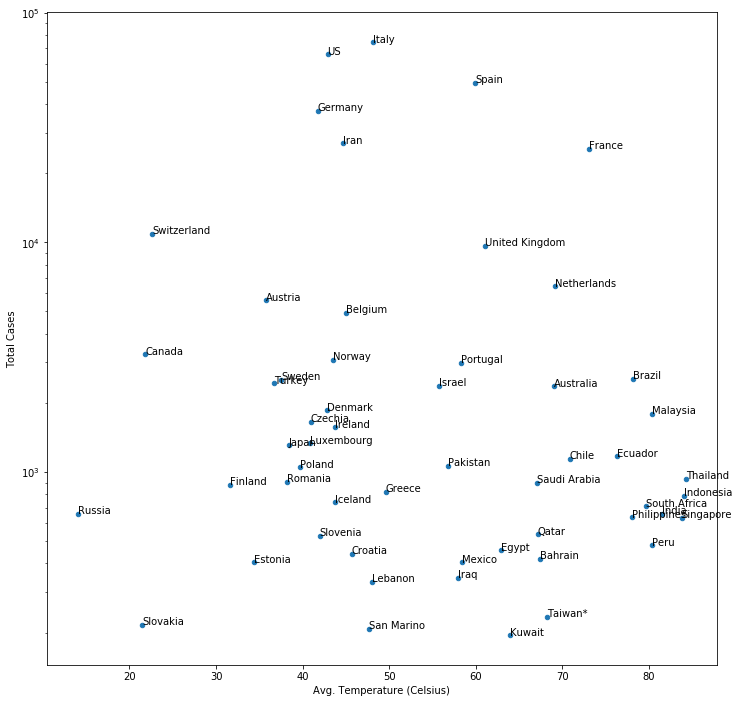

In [76]:
fig,ax=plt.subplots(figsize=(12,12))
confirmed_fit_df.plot('temp', 'total cases', kind='scatter', ax=ax)
confirmed_fit_df[['temp','total cases','Country']].apply(lambda row: ax.text(*row),axis=1);
plt.xlabel('Avg. Temperature (Celsius)')
plt.ylabel('Total Cases')
plt.yscale('log')

In [88]:
df_pop=pd.read_csv("../SIER-SIR/population_by_country_2020.csv")
df_pop.head()
common_countries=np.intersect1d(df_pop["Country (or dependency)"].values, top_affected_countries)
pop=df_pop.groupby(['Country (or dependency)']).sum()['Population (2020)']
dens=df_pop.groupby(['Country (or dependency)']).sum()['Density (P/Km²)']
confirmed_fit_df['Population']=pop[confirmed_fit_df['Country'].values].values
confirmed_fit_df['Population Density']=dens[confirmed_fit_df['Country'].values].values
confirmed_fit_df.to_csv(r'top_countries_confirmed_fit_y.csv', index = False)#Korea,south US czechia Diamond Princess
#plt.plot(confirmed_fit_df['Population Density'],confirmed_fit_df['slope(log cases)'],'.')
confirmed_fit_df['fraction of Population affected per million'] = 1e6*confirmed_fit_df['total cases']/confirmed_fit_df['Population']

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


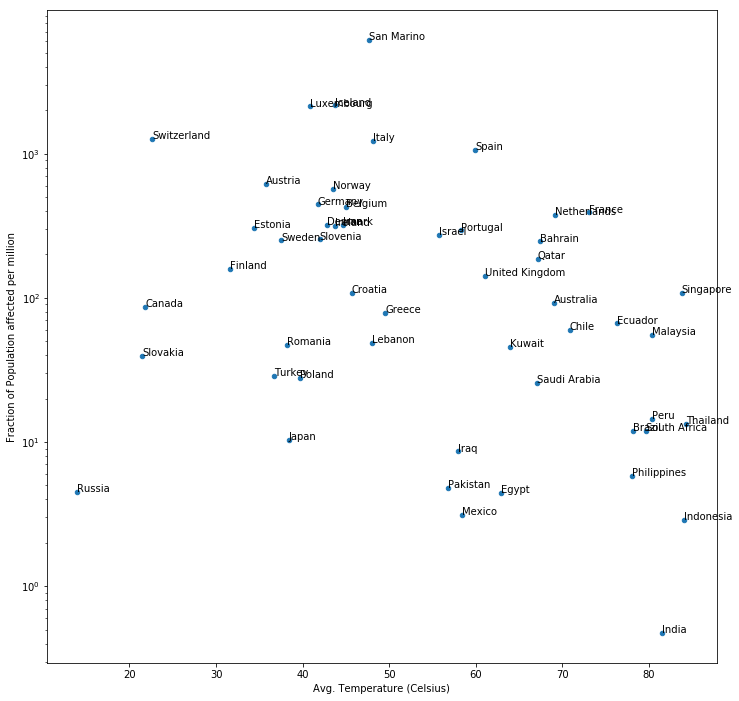

In [90]:
fig,ax=plt.subplots(figsize=(12,12))
confirmed_fit_df.plot('temp', 'fraction of Population affected per million', kind='scatter', ax=ax)
confirmed_fit_df[['temp','fraction of Population affected per million','Country']].apply(lambda row: ax.text(*row),axis=1);
plt.xlabel('Avg. Temperature (Celsius)')
plt.ylabel('Fraction of Population affected per million')
plt.yscale('log')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


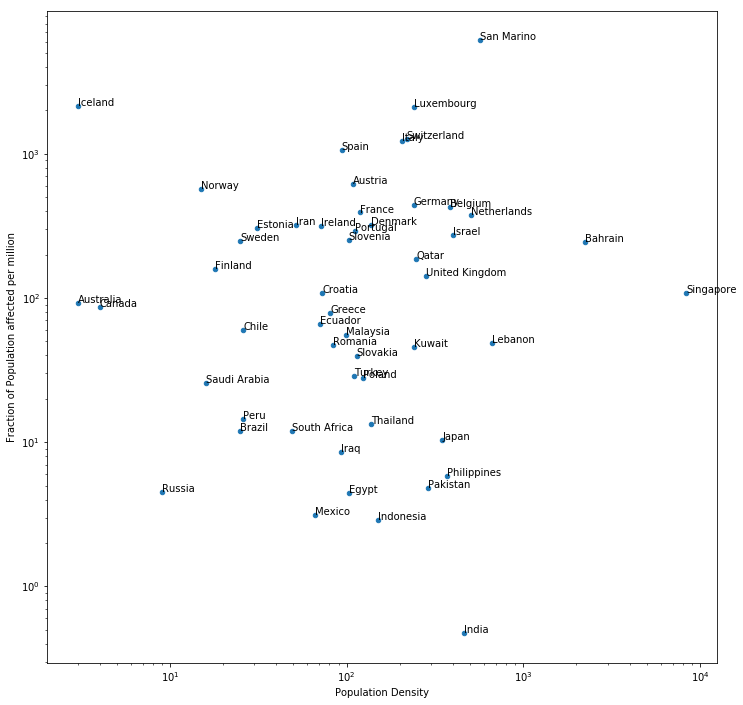

In [98]:
fig,ax=plt.subplots(figsize=(12,12))
confirmed_fit_df.plot('Population Density', 'fraction of Population affected per million', kind='scatter', ax=ax)
confirmed_fit_df[['Population Density','fraction of Population affected per million','Country']].apply(lambda row: ax.text(*row),axis=1);
plt.xlabel('Population Density')
plt.ylabel('Fraction of Population affected per million')
plt.yscale('log')
plt.xscale('log')

#plt.xlim(0,3e3)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


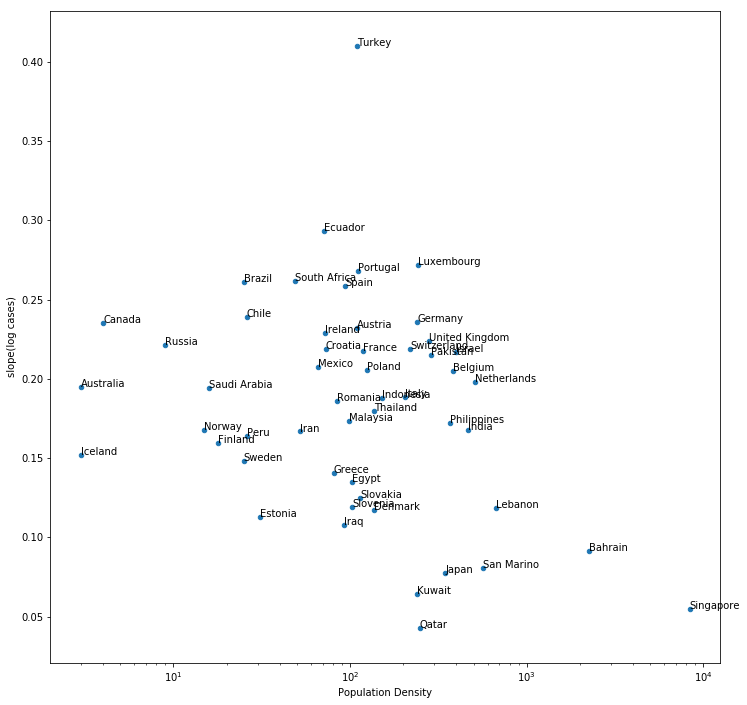

In [99]:
fig,ax=plt.subplots(figsize=(12,12))
confirmed_fit_df.plot('Population Density', 'slope(log cases)', kind='scatter', ax=ax)
confirmed_fit_df[['Population Density','slope(log cases)','Country']].apply(lambda row: ax.text(*row),axis=1);
plt.xlabel('Population Density')
plt.ylabel('slope(log cases)')
plt.xscale('log')

#plt.xlim(0,3e3)


# y predictions assuming exponential growth phase

In [100]:
def y_pred(active_fit_df, t_len=65):
    for day in range(t_len):
        active_fit_df['exp MSE'] = np.exp(active_fit_df['MSE fit'])
        active_fit_df['pred_day ' + str(day)] = np.exp(active_fit_df['slope(log cases)']*day + active_fit_df['intersecpt(log cases)'])
    return active_fit_df

In [101]:
#active_fit_df_y=y_pred(active_fit_df)
#active_fit_df_y.to_csv(r'47_countries_active_fit_y.csv', index = False)
confirmed_fit_df_y=y_pred(confirmed_fit_df)
#active_fit_df_y[active_fit_df_y.columns[7:]].as_matrix()
confirmed_fit_df_y

,Country,slope(log cases),start day,start date,intersecpt(log cases),MSE fit,total cases,temp,Population,Population Density,...,pred_day 55,pred_day 56,pred_day 57,pred_day 58,pred_day 59,pred_day 60,pred_day 61,pred_day 62,pred_day 63,pred_day 64
23,Diamond Princess,0.033146,16,2/7/20,5.391695,4.110874,712,NaN,NaN,NaN,...,1.359287e+03,1.405097e+03,1.452451e+03,1.501400e+03,1.551999e+03,1.604303e+03,1.658371e+03,1.714260e+03,1.772032e+03,1.831752e+03
29,Qatar,0.042884,49,3/11/20,5.716136,5.568345,537,67.165079,2.881053e+06,248.0,...,3.212381e+03,3.353138e+03,3.500062e+03,3.653424e+03,3.813507e+03,3.980603e+03,4.155021e+03,4.337082e+03,4.527120e+03,4.725485e+03
34,Singapore,0.054785,21,2/12/20,3.841854,3.912023,631,83.803175,5.850342e+06,8358.0,...,9.486571e+02,1.002080e+03,1.058511e+03,1.118119e+03,1.181085e+03,1.247596e+03,1.317853e+03,1.392067e+03,1.470459e+03,1.553266e+03
53,Kuwait,0.064222,40,3/2/20,3.844820,4.025352,195,63.982540,4.270571e+06,240.0,...,1.598853e+03,1.704904e+03,1.817989e+03,1.938575e+03,2.067159e+03,2.204273e+03,2.350481e+03,2.506387e+03,2.672634e+03,2.849908e+03
18,Japan,0.077779,25,2/16/20,4.387952,4.077537,1307,38.376190,1.264765e+08,347.0,...,5.800947e+03,6.270147e+03,6.777298e+03,7.325468e+03,7.917976e+03,8.558409e+03,9.250642e+03,9.998865e+03,1.080761e+04,1.168176e+04
54,San Marino,0.080514,48,3/10/20,4.100305,3.931826,208,47.622222,3.393100e+04,566.0,...,5.057276e+03,5.481299e+03,5.940874e+03,6.438982e+03,6.978853e+03,7.563989e+03,8.198186e+03,8.885556e+03,9.630558e+03,1.043802e+04
42,Bahrain,0.091213,42,3/4/20,4.195626,3.951244,419,67.450794,1.701575e+06,2239.0,...,1.002007e+04,1.097701e+04,1.202535e+04,1.317380e+04,1.443192e+04,1.581021e+04,1.732012e+04,1.897423e+04,2.078632e+04,2.277146e+04
49,Iraq,0.107988,45,3/7/20,3.906519,3.988984,346,57.950794,4.022249e+07,93.0,...,1.887961e+04,2.103253e+04,2.343095e+04,2.610287e+04,2.907949e+04,3.239553e+04,3.608972e+04,4.020518e+04,4.478993e+04,4.989751e+04
44,Estonia,0.112981,51,3/13/20,4.788809,4.369448,404,34.393651,1.326535e+06,31.0,...,6.003864e+04,6.721988e+04,7.526007e+04,8.426195e+04,9.434054e+04,1.056246e+05,1.182584e+05,1.324033e+05,1.482401e+05,1.659712e+05
15,Denmark,0.117076,47,3/9/20,5.783024,4.521789,1862,42.869048,5.792202e+06,137.0,...,2.032562e+05,2.285016e+05,2.568828e+05,2.887889e+05,3.246580e+05,3.649823e+05,4.103150e+05,4.612783e+05,5.185714e+05,5.829807e+05
